###Generall Analysis of all tweets
**Each data set here analized is collected from Twitter REST API searched for hashtags used in the days near manifestations against Dilma's government that happened in Brazil during August 16th, 2015**
- Graphs bellow show the amount of tweets for each hashtag, which are:
 - \#dilma
 - @dilma
 - pretrolao
 - foraDilma
 - corrupcao
 - petrolao
 


In [11]:
import io
import json
import matplotlib.pyplot as plt
import datetime
from collections import Counter

In [85]:
DIR = 'D:/TCC/Data/REST API/'
data = []

with io.open(DIR+'tweets_vemprarua.txt','r',encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

In [42]:
# Tweets by month.
%pylab inline
def parse_date(datestring):
    """ Input, e.g., Mon Aug 24 19:41:14 +0000 2015
    Output, e.g., 2012-10"""
    #print datestring
    parts = datestring.split()
    return parts[2] 

Populating the interactive namespace from numpy and matplotlib


All tweets [27509, 2894, 388, 394, 385, 210, 177, 252, 123] .Total:  32332


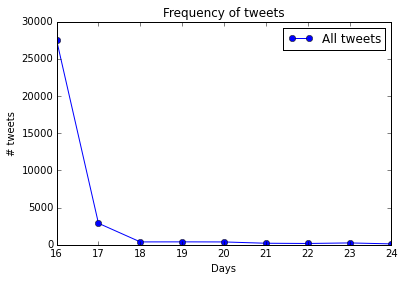

In [76]:
def tweets_by_month(tweets):
    #parsing date for all_tweets, positive and negative

    months = Counter(parse_date(x['created_at']) for x in tweets if parse_date(x['created_at']) > '15')#all
    months = sorted(months.items())
 
    values = [r[1] for r in months]
    keys = [r[0] for r in months]
    print 'All tweets', values, '.Total: ',sum(values)

    line, = plt.plot(keys, values,'bo-', label="Line ")#, linestyle='dotted')
    plt.xlabel('Days')
    plt.ylabel('# tweets')
    plt.title('Frequency of tweets')
    plt.legend([line], ["All tweets"], loc=0)



All tweets [27509, 2894, 388, 394, 385, 210, 177, 252, 123] .Total:  32332


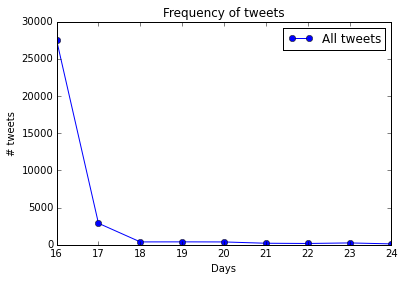

In [89]:
tweets_by_month(data)

In [65]:
data_hashdilma = []
with io.open(DIR+'tweets#dilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_hashdilma.append(json.loads(line))

All tweets [2485, 1174, 683, 679, 664, 490, 769, 463, 426] .Total:  7833


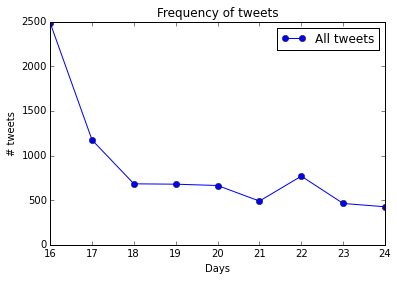

In [77]:
tweets_by_month(data_hashdilma)

In [68]:
data_dilma_mentions = []
with io.open(DIR+'tweets@dilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_dilma_mentions.append(json.loads(line))

All tweets [42, 209, 128, 25, 66, 57, 30, 22, 27] .Total:  606


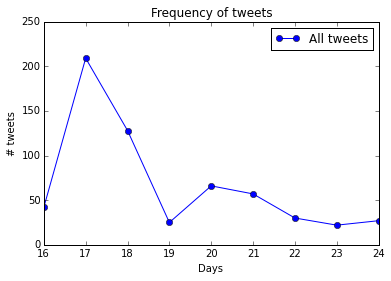

In [78]:
tweets_by_month(data_dilma_mentions)

In [70]:
data_corrup = []
with io.open(DIR+'tweets_corrupcao.txt','r',encoding="utf-8") as f:
    for line in f:
        data_corrup.append(json.loads(line))

All tweets [29697, 17450, 10017, 14962, 16766, 11616, 7120, 5959, 4280] .Total:  117867


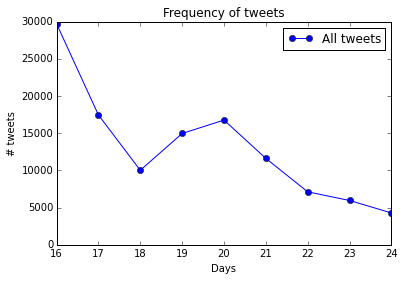

In [79]:
tweets_by_month(data_corrup)

In [81]:
data_foraDilma = []
with io.open(DIR+'tweets_foraDilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_foraDilma.append(json.loads(line))

All tweets [10569, 16599, 5038, 2791, 5489, 4664, 4038, 4484, 2403] .Total:  56075


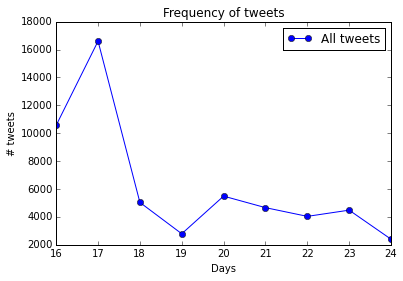

In [82]:
tweets_by_month(data_foraDilma)

In [83]:
data_tweets_petrolao = []
with io.open(DIR+'tweets_foraDilma.txt','r',encoding="utf-8") as f:
    for line in f:
        data_tweets_petrolao.append(json.loads(line))


All tweets [10569, 16599, 5038, 2791, 5489, 4664, 4038, 4484, 2403] .Total:  56075


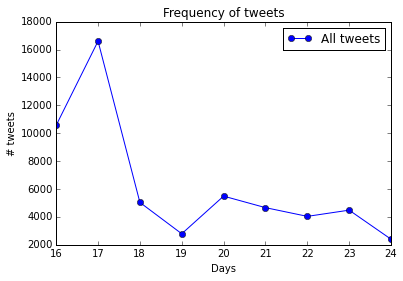

In [84]:
tweets_by_month(data_tweets_petrolao)

In [91]:
data_tweets_foraPT = []
with io.open(DIR+'tweets_foraPT.txt','r',encoding="utf-8") as f:
    for line in f:
        data_tweets_foraPT.append(json.loads(line))

All tweets [2193, 3516, 1891] .Total:  7600


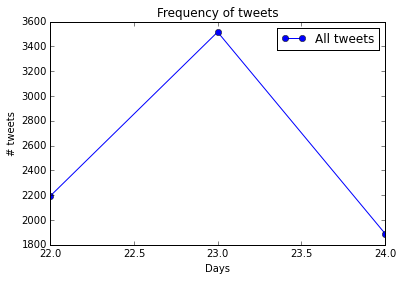

In [92]:
tweets_by_month(data_tweets_foraPT)

In [95]:
for d in data_tweets_foraPT:
    print d['created_at'] 


Mon Aug 24 23:10:38 +0000 2015
Mon Aug 24 23:09:31 +0000 2015
Mon Aug 24 23:09:30 +0000 2015
Mon Aug 24 23:07:37 +0000 2015
Mon Aug 24 23:07:31 +0000 2015
Mon Aug 24 23:07:15 +0000 2015
Mon Aug 24 23:04:50 +0000 2015
Mon Aug 24 23:02:25 +0000 2015
Mon Aug 24 23:01:54 +0000 2015
Mon Aug 24 22:55:28 +0000 2015
Mon Aug 24 22:54:59 +0000 2015
Mon Aug 24 22:53:03 +0000 2015
Mon Aug 24 22:52:15 +0000 2015
Mon Aug 24 22:51:13 +0000 2015
Mon Aug 24 22:43:58 +0000 2015
Mon Aug 24 22:41:04 +0000 2015
Mon Aug 24 22:40:26 +0000 2015
Mon Aug 24 22:40:00 +0000 2015
Mon Aug 24 22:39:47 +0000 2015
Mon Aug 24 22:39:28 +0000 2015
Mon Aug 24 22:39:04 +0000 2015
Mon Aug 24 22:38:42 +0000 2015
Mon Aug 24 22:37:37 +0000 2015
Mon Aug 24 22:36:40 +0000 2015
Mon Aug 24 22:32:13 +0000 2015
Mon Aug 24 22:29:43 +0000 2015
Mon Aug 24 22:27:49 +0000 2015
Mon Aug 24 22:26:54 +0000 2015
Mon Aug 24 22:25:52 +0000 2015
Mon Aug 24 22:24:29 +0000 2015
Mon Aug 24 22:24:01 +0000 2015
Mon Aug 24 22:23:58 +0000 2015
Mon Aug 